# Exploratory Data Analysis & Intro (SEA)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_SEA = df[df['job_country'].isin(ASEAN)].copy()


# Roles to Explore

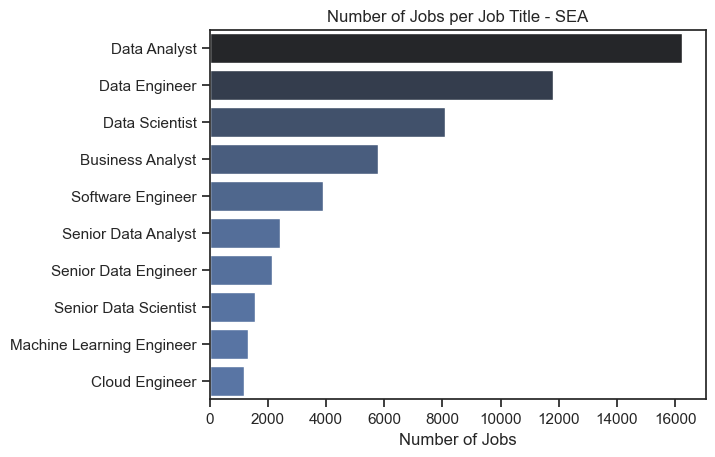

In [36]:
df_plot = df_SEA['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue ='count', palette ='dark:b_r', legend = False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Job Title - SEA')
plt.show()


# Countries to Explore - Worldwide

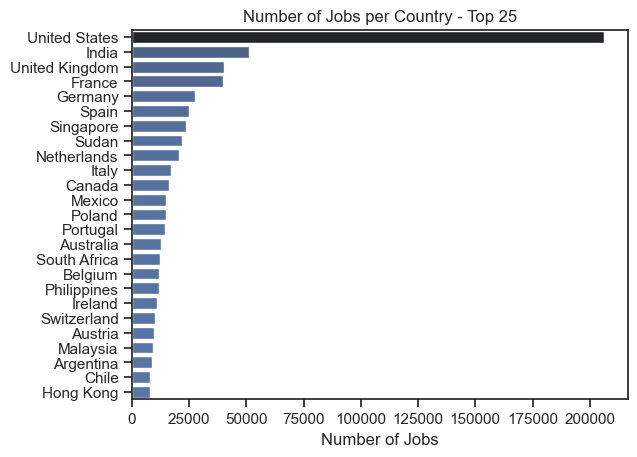

In [37]:
df_plot2 = df['job_country'].value_counts().to_frame().head(25)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot2, x='count', y='job_country', hue='count', palette= 'dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Country - Top 25')
plt.show()

# ASEAN Countries in Comparison

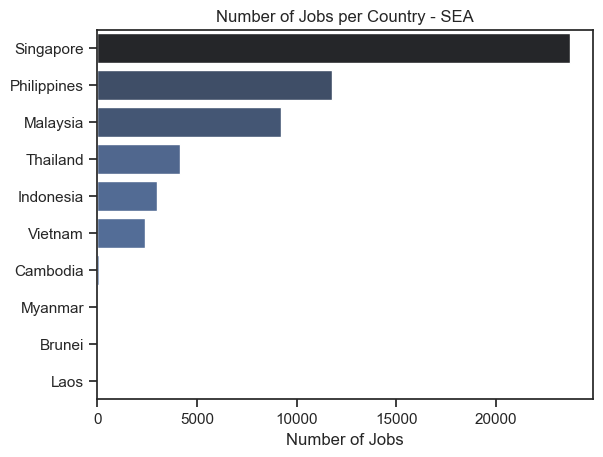

In [38]:
df_plot3 = df_SEA['job_country'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot3, x='count', y='job_country', hue='count', palette= 'dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Country - SEA')
plt.show()